# GARCH

In [2]:
# Import pandas & yfinance
# Import numpy
from collections import OrderedDict
from pathlib import Path
from pprint import pprint

import numpy as np
import pandas as pd
import yfinance as yf
from numpy.linalg import multi_dot
from scipy import stats
from tabulate import tabulate

# Set numpy random seed
np.random.seed(23)

In [3]:
import cufflinks as cf

cf.set_config_file(offline=True, theme="solar", dimensions=((1000, 600)))
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.templates.default = pio.templates["plotly_dark"]

px.defaults.width, px.defaults.height = 1000, 600

In [4]:
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.precision", 4)

## Data

In [8]:
# Read from file
df = pd.read_csv("data/india_stocks.csv", index_col=0, parse_dates=True)
# Display dataframe
df

,ASIANPAINT,HDFCBANK,ITC,RELIANCE,TCS
Date,,,,,
2015-01-01 00:00:00+05:30,704.9195,446.3565,191.1795,417.9889,1065.1387
2015-01-02 00:00:00+05:30,729.2903,452.5686,191.7784,416.8826,1079.3236
2015-01-05 00:00:00+05:30,729.2432,448.7476,192.5334,412.3163,1062.9208
2015-01-06 00:00:00+05:30,711.8356,441.7619,187.5866,393.6035,1023.7350
2015-01-07 00:00:00+05:30,726.1381,443.0511,184.0978,402.1714,1011.6425
...,...,...,...,...,...
2022-12-26 00:00:00+05:30,3035.8335,1610.9755,327.3880,2524.0500,3156.5701
2022-12-27 00:00:00+05:30,3092.0093,1612.6068,325.9692,2544.7000,3162.9751
2022-12-28 00:00:00+05:30,3103.0359,1611.3215,327.1923,2544.4500,3160.6460


In [9]:
# Calculate daily returns
returns = df.pct_change().dropna()
returns.head()

,ASIANPAINT,HDFCBANK,ITC,RELIANCE,TCS
Date,,,,,
2015-01-02 00:00:00+05:30,3.4572e-02,0.0139,0.0031,-0.0026,0.0133
2015-01-05 00:00:00+05:30,-6.4526e-05,-0.0084,0.0039,-0.0110,-0.0152
2015-01-06 00:00:00+05:30,-2.3871e-02,-0.0156,-0.0257,-0.0454,-0.0369
2015-01-07 00:00:00+05:30,2.0092e-02,0.0029,-0.0186,0.0218,-0.0118
2015-01-08 00:00:00+05:30,6.3043e-02,0.0210,0.0250,-0.0143,0.0108


In [10]:
# Stock returns
stockreturn = returns["HDFCBANK"]
# Calculate mean and standard deviation
mean = np.mean(stockreturn)
stdev = np.std(stockreturn)
# Calculate VaR at difference confidence level
VaR_90 = stats.norm.ppf(1 - 0.90, mean, stdev)
VaR_95 = stats.norm.ppf(1 - 0.95, mean, stdev)
VaR_99 = stats.norm.ppf(1 - 0.99, mean, stdev)

## ARCH Toolbox

In [19]:
# Import arch library
from arch import arch_model

In [11]:
# Mean zero
g1 = arch_model(stockreturn, vol='GARCH', mean='Constant', p=1, q=1,dist='Normal')
model = g1.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.5280604747350412e+20
Iteration:      2,   Func. Count:     18,   Neg. LLF: -5821.125069688562
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5821.125065404095
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2


In [12]:
# Model output
print(model)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:               HDFCBANK   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5821.13
Distribution:                  Normal   AIC:                          -11634.3
Method:            Maximum Likelihood   BIC:                          -11611.9
                                        No. Observations:                 1975
Date:                Fri, Jul 28 2023   Df Residuals:                     1974
Time:                        12:39:16   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0415e-03  1.705e-05     61.094      0.000 [1.

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               HDFCBANK   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5821.13
Distribution:                  Normal   AIC:                          -11634.3
Method:            Maximum Likelihood   BIC:                          -11611.9
                                        No. Observations:                 1975
Date:                Fri, Jul 28 2023   Df Residuals:                     1974
Time:                        12:39:16   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0415e-03  1.705e-05     61.094      0.000 [1.008e-03,1.075e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.3350e-06  5.978e-11  7.252e+04      0.000 [4.335e-06,4.335e-06]
alpha[1]       0.1000  2.815e-02      3.552  3.816e-04   [4.483e-02,  0.155]
beta[1]        0.8800  2.391e-02     36.801 1.781e-296     [  0.833,  0.927]
============================================================================

Covariance estimator: robust
"""

In [14]:
# Model params
model.params

mu          1.0415e-03
omega       4.3350e-06
alpha[1]    1.0000e-01
beta[1]     8.8000e-01
Name: params, dtype: float64

In [15]:
# Model Confidence Interval
model.conf_int(alpha=.05)

,lower,upper
mu,1.0081e-03,1.0750e-03
omega,4.3349e-06,4.3352e-06
alpha[1],4.4828e-02,1.5517e-01
beta[1],8.3313e-01,9.2687e-01


In [20]:
# Model Confidence Interval
model.conf_int(alpha=.01)

,lower,upper
mu,9.9763e-04,1.0855e-03
omega,4.3349e-06,4.3352e-06
alpha[1],2.7492e-02,1.7251e-01
beta[1],8.1841e-01,9.4159e-01


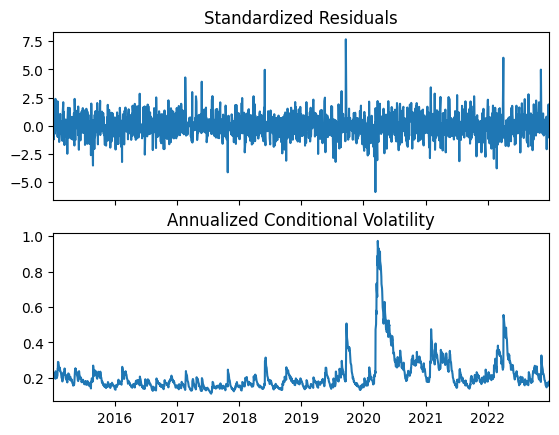

In [16]:
# Plot annualised vol
fig = model.plot(annualize='D')

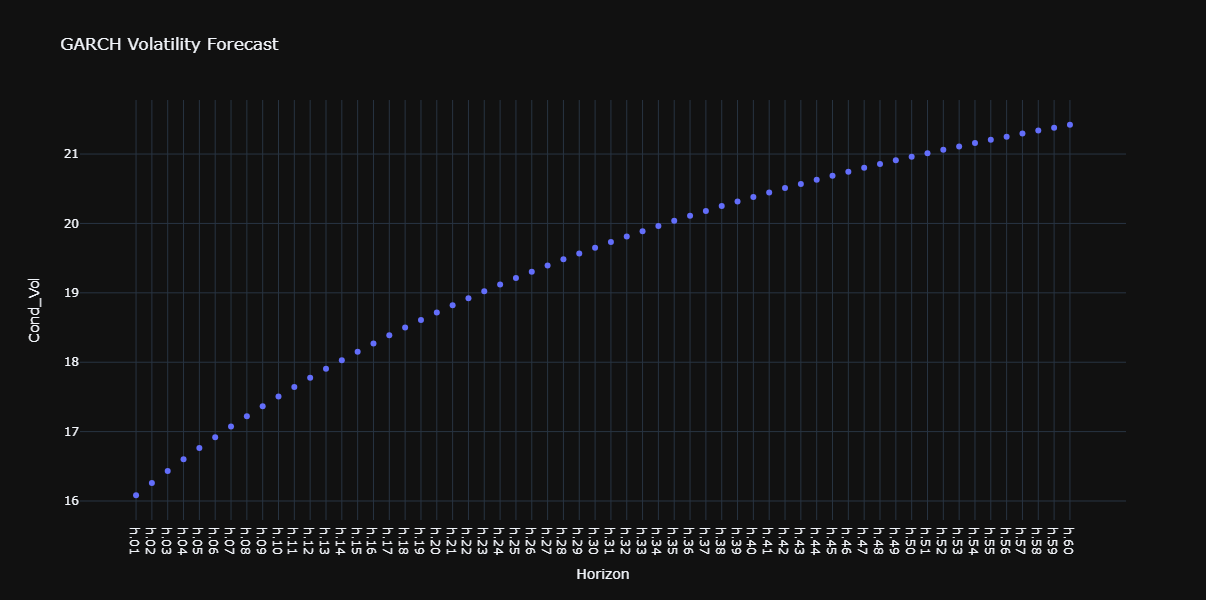

In [23]:
# Forecast for next 5 days
model_forecast = model.forecast(horizon=60)
# Plot forecasted volatility
fdf = pd.DataFrame(np.sqrt(model_forecast.variance.dropna().T *252)*100)
fdf.columns = ['Cond_Vol']
px.scatter(fdf, fdf.index, 'Cond_Vol', labels={'index':'Horizon'}, title='GARCH Volatility Forecast')